In [1]:
# Input data
import numpy as np
from utilities import *

# test and train read
X_train_valid, Y_train_valid, _ = read_data(data_path="../../datasets/har/har-data/", split="train")
X_test, Y_test, _ = read_data(data_path="../../datasets/har/har-data/", split="test")

In [2]:
# Normalizing/standardizing the input data features
X_train_valid_norm, X_test_norm = standardize(test=X_test, train=X_train_valid)
Y_train_valid_onehot = one_hot(labels=Y_train_valid.reshape(-1), n_class=6) 
Y_test_onehot = one_hot(labels=Y_test.reshape(-1), n_class=6) 

In [3]:
# Train and valid split
from sklearn.model_selection import train_test_split

X_train_norm, X_valid_norm, Y_train_onehot, Y_valid_onehot = train_test_split(X_train_valid_norm, 
                                                                              Y_train_valid_onehot,
                                                                              test_size=0.10)

In [17]:
## Hyperparameters
# Input data
# NWC for signal: N is batch size, W is the width/sequence length, and C is the number of channels
# NHWC for images: This is the same as signals and H stands for height
N, W, C = X_train_norm.shape[0]//100, X_train_norm.shape[1], X_train_norm.shape[2]
print('N, W, C', N, W, C)
batch_size, seq_len, n_channels = N, W, C
print('batch_size, seq_len, n_channels', batch_size, seq_len, n_channels)

# Output labels
n_classes = Y_train_valid.max(axis=0)
assert Y_train_valid.max(axis=0) == Y_test.max(axis=0)
print('n_classes', n_classes)

# learning parameters
learning_rate = 0.001 #1e-3
epochs = 1000 # num iterations for updating model
keep_prob = 0.90 # 90% neurons are kept and 10% are dropped out

N, W, C 66 128 9
batch_size, seq_len, n_channels 66 128 9
n_classes 6


In [5]:
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [6]:
# Input and output and hyperpaprameters NP tensors to feed into TF tensors: NP2TF tensors for computation
# Input and output and hyperpaprameters tensors to feed into the tensor flow framwork
Xin = tf.placeholder(dtype=tf.float32, shape=[None, seq_len, n_channels], name=None)
keep_prob_= tf.placeholder(dtype=tf.float32, name=None, shape=None)
learning_rate_ = tf.placeholder(dtype=tf.float32, name=None, shape=None)

In [7]:
# # Successfully implemented!
# # Simple example of running it;
# # This is a simple example of using placeholder to define a tensor and feed it into the session
# # Also doing this, we can see how it might work using the session
# # tensor, varilable, and operation for generating an output for high performance computation
# Xexample = tf.placeholder(dtype=tf.float32, shape=(1024, 1024), name=None)
# Yexample = tf.matmul(a=Xexample, b=Xexample, name=None)

# with tf.Session() as sess:
# #   print(sess.run(y))  # ERROR: will fail because x was not fed.

# #     rand_array = np.random.rand(1024, 1024)
# #     Xin = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=Xexample.shape, stddev=1.)    
#     Xin = np.random.normal(loc=0., scale=1., size=Xexample.shape)
#     print(Xexample.shape)
#     print(Xin.shape, Xin.dtype)
#     Yout = sess.run(fetches=Yexample, feed_dict={Xexample: Xin})
#     print(Yout.shape, Yout.dtype, Yexample.shape, Yexample.dtype)  # Will succeed.

In [8]:
# Successfull!
# print(inputs_.shape, inputs_.dtype, inputs_.shape[0], inputs_.shape[1], inputs_.shape[2])
# # NWC=?, 128, 9
# width, in_ch, out_ch = inputs_.shape[1]//4, inputs_.shape[2], inputs_.shape[2]*2
# # print(width, in_ch, out_ch)
# filter_shape=[width.value, in_ch.value, out_ch.value]
# print(filter_shape)
# init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, stddev=1., shape=filter_shape)
# # print(init_val.shape, init_val.dtype)
# # filters = tf.get_variable(shape=[width, in_ch, out_ch], name='conv1d1', dtype=tf.float32, trainable=True)
# filter1 = tf.Variable(initial_value=init_val, dtype=tf.float32, name=None, trainable=True)
# conv1d = tf.nn.conv1d(data_format='NWC', filters=filter1, name=None, padding='SAME', stride=2,
#                       use_cudnn_on_gpu=True, value=inputs_)
# print(conv1d.shape, conv1d.dtype)
# filterT = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
# print(filterT.shape, filterT.dtype)
# output_shape = [batch_size, inputs_.shape[1].value, inputs_.shape[2].value]
# print(output_shape)
# conv1dT = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=filterT, name=None, output_shape=output_shape, 
#                                          padding='SAME', stride=2, value=conv1d)
# print(conv1dT.shape, conv1d.dtype)

In [9]:
# Successfull!
# # This is explaining a single operation on input tensors and varilables to generate the output tensor
# # The pull request is open as of this moment, so the API and behavior can and probably will change. 
# # Some feature that one might expect from conv1d_transpose aren't supported:

# # output_shape requires batch size to be known statically, can't pass -1;
# # on the other hand, output shape is dynamic (this explains None dimension).
# # Also, the kernel_width=7 expects in_width=255, not 256. 
# # Should make kernel_width less than 4 to match in_width=256. 
# # The result is this demo code:
# Xexample = tf.placeholder(shape=[None, 256, 16], dtype=tf.float32, name=None)
# print(Xexample.shape, Xexample.dtype)
# [kernel_width, output_depth, input_depth] = [Xexample.shape[1].value//4, Xexample.shape[2].value//2, 
#                                              Xexample.shape[2].value]
# shape = [kernel_width, output_depth, input_depth] 
# print(shape)
# init_val = tf.random_normal(shape=shape, dtype=tf.float32, mean=0., name=None, stddev=1.)
# Wexample = tf.Variable(initial_value=init_val, dtype=tf.float32, name=None, trainable=True)
# print(Wexample.shape, Wexample.dtype)
# # output shape is based on NWC: batch size, width, and Channels
# stride = 4
# shape = [1, Xexample.shape[1].value*stride, Wexample.shape[1].value] 
# print(shape)
# Yexample = tf.contrib.nn.conv1d_transpose(value=Xexample, filter=Wexample, output_shape=shape, data_format='NWC',
#                                      name=None, stride=4, padding='SAME')
# # both paddings 'SAME' or 'VALID' work # any difference?
# print(Yexample.shape, Yexample.dtype)

# with tf.Session() as sess:
#     sess.run(fetches=tf.global_variables_initializer())
#     print(Xexample.shape)
#     shape = [Yexample.shape[0].value, Xexample.shape[1].value, Xexample.shape[2].value]
#     print(shape)
#     Xin = np.random.normal(loc=0., scale=1., size=shape) 
#     Yout = sess.run(fetches=Yexample, feed_dict={Xexample: Xin})
#     print(Yout.shape, Yout.dtype)

In [10]:
print(Xin.shape, Xin.dtype)
# shape = [kernel_width, input_depth, output_depth] 
W, Cin, Cout = Xin.shape[1].value//4, Xin.shape[2].value, Xin.shape[2].value*2
shape = [W, Cin, Cout]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W1 = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W1.shape, W1.dtype)
Xconv1 = tf.nn.conv1d(data_format='NWC', filters=W1, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=Xin)
Xconv1 = tf.nn.relu(features=Xconv1, name=None)
print(Xconv1.shape, Xconv1.dtype)

(?, 128, 9) <dtype: 'float32'>
(32, 9, 18) <dtype: 'float32_ref'>
(?, 64, 18) <dtype: 'float32'>


In [11]:
print(Xconv1.shape, Xconv1.dtype)
W, Cin, Cout = Xconv1.shape[1].value//4, Xconv1.shape[2].value, Xconv1.shape[2].value*2
shape = [W, Cin, Cout]
init_val = tf.random_normal(dtype=tf.float32, mean=0.0, name=None, shape=shape, stddev=1.0)
W2 = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W2.shape, W2.dtype)
Xconv2 = tf.nn.conv1d(data_format='NWC', filters=W2, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=Xconv1)
Xconv2 = tf.nn.relu(features=Xconv2, name=None)
print(Xconv2.shape, Xconv2.dtype)

(?, 64, 18) <dtype: 'float32'>
(16, 18, 36) <dtype: 'float32_ref'>
(?, 32, 36) <dtype: 'float32'>


In [12]:
print(Xconv2.shape, Xconv2.dtype)
W, Cin, Cout = Xconv2.shape[1].value//4, Xconv2.shape[2].value, Xconv2.shape[2].value*2
shape = [W, Cin, Cout]
init_val = tf.random_normal(dtype=tf.float32, mean=0.0, name=None, shape=shape, stddev=1.0)
W3 = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W3.shape, W3.dtype)
Xconv3 = tf.nn.conv1d(data_format='NWC', filters=W3, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=Xconv2)
Xconv3 = tf.nn.relu(features=Xconv3, name=None)
print(Xconv3.shape, Xconv3.dtype)

(?, 32, 36) <dtype: 'float32'>
(8, 36, 72) <dtype: 'float32_ref'>
(?, 16, 72) <dtype: 'float32'>


In [13]:
print(Xconv3.shape, Xconv3.dtype)
W, Cin, Cout = Xconv2.shape[1].value//4, Xconv2.shape[2].value, Xconv2.shape[2].value*2
shape = [W, Cin, Cout]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W3T = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W3T.shape, W3T.dtype)
# output shape should be NWC equal to Xconv2
out_shape = [batch_size, Xconv2.shape[1].value, Xconv2.shape[2].value] # NWC, only N should be set (experimental)
print(out_shape)
Xconv2_ = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=W3T, name=None, padding='SAME', stride=2, 
                                         value=Xconv3, output_shape=out_shape)
Xconv2_ = tf.nn.relu(features=Xconv2_, name=None)
print(Xconv2_.shape, Xconv2_.dtype)
print(Xconv2.shape, Xconv2.dtype)

(?, 16, 72) <dtype: 'float32'>
(8, 36, 72) <dtype: 'float32_ref'>
[66, 32, 36]
Instructions for updating:
Use the retry module or similar alternatives.
(66, 32, 36) <dtype: 'float32'>
(?, 32, 36) <dtype: 'float32'>


In [14]:
print(Xconv2_.shape, Xconv2_.dtype)
W, Cin, Cout = Xconv1.shape[1].value//4, Xconv1.shape[2].value, Xconv1.shape[2].value*2
shape = [W, Cin, Cout]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W2T = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W2T.shape, W2T.dtype)
# output shape should be NWC equal to Xconv1
out_shape = [batch_size, Xconv1.shape[1].value, Xconv1.shape[2].value] # NWC, only N should be set (experimental)
print(out_shape)
Xconv1_ = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=W2T, name=None, padding='SAME', stride=2, 
                                         value=Xconv2_, output_shape=out_shape)
Xconv1_ = tf.nn.relu(features=Xconv1_, name=None)
print(Xconv1_.shape, Xconv1_.dtype)
print(Xconv1.shape, Xconv1.dtype)

(66, 32, 36) <dtype: 'float32'>
(16, 18, 36) <dtype: 'float32_ref'>
[66, 64, 18]
(66, 64, 18) <dtype: 'float32'>
(?, 64, 18) <dtype: 'float32'>


In [15]:
print(Xconv1_.shape, Xconv1_.dtype)
W, Cin, Cout = Xin.shape[1].value//4, Xin.shape[2].value, Xin.shape[2].value*2 
shape = [W, Cin, Cout]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W1T = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W1T.shape, W1T.dtype)
# output shape should be NWC equal to Xin
out_shape = [batch_size, Xin.shape[1].value, Xin.shape[2].value] # NWC, only N should be set (experimental)
print(out_shape)
Xout = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=W1T, name=None, padding='SAME', stride=2, 
                                         value=Xconv1_, output_shape=out_shape)
# Xin_ = tf.nn.relu(features=Xin_, name=None)
print(Xout.shape, Xout.dtype)
print(Xin.shape, Xin.dtype)

(66, 64, 18) <dtype: 'float32'>
(32, 9, 18) <dtype: 'float32_ref'>
[66, 128, 9]
(66, 128, 9) <dtype: 'float32'>
(?, 128, 9) <dtype: 'float32'>


In [16]:
# Backward pass: error backpropagation
# Cost function
# cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost_tensor = tf.nn.sigmoid_cross_entropy_with_logits(labels=Xin, logits=Xout, name=None)
print(cost_tensor.shape, cost_tensor.dtype)
cost = tf.reduce_mean(input_tensor=cost_tensor)
# The cost has to be positive since it is a distance between two vectors in the hyperspace
# Eucleadian dist or length, angle or entropy are all these kinds of distance
cost = tf.abs(name=None, x=cost)
print(cost.shape, cost.dtype)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)
print('optimizer', optimizer)

(66, 128, 9) <dtype: 'float32'>
() <dtype: 'float32'>
optimizer name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/update_Variable_2/ApplyAdam"
input: "^Adam/update_Variable_3/ApplyAdam"
input: "^Adam/update_Variable_4/ApplyAdam"
input: "^Adam/update_Variable_5/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [18]:
# Save the training result or trained and validated model params
saver = tf.train.Saver()
train_loss, valid_loss = [], []

with tf.Session() as sess:
    # my assumption is the local variables are the parameters and hyperparameters
    # the globala variables are the one needed/required by the seession/graph to run
    sess.run(fetches=tf.global_variables_initializer())
   
    # Loop over epochs
    for e in range(epochs):
        
        # Loop over batches
        for X_train_norm_batch, _ in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            ######################## Training
            # Feed dictionary
            feed = {Xin : X_train_norm_batch, keep_prob_ : keep_prob, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ = sess.run(fetches=[cost, optimizer], feed_dict = feed)
            train_loss.append(loss)

            ################## Validation
            loss_batch = []    
            # Loop over batches
            for X_valid_norm_batch, _ in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

                # Feed dictionary
                feed = {Xin : X_valid_norm_batch, keep_prob_ : 1.0} 
                # no learning is needed therefore no learning rate is needed.

                # Loss
                loss = sess.run(fetches=[cost], feed_dict = feed)
                # no learning is needed therefore no learning rate is needed.
                # Therefore no optimization approach or backprop is needed either.
                loss_batch.append(loss)

            # Store
            valid_loss.append(np.mean(loss_batch))
            
        # Print info for every iter/epoch
        print("Epoch: {}/{}".format(e+1, epochs),
              "Train loss: {:6f}".format(np.mean(train_loss)),
              "Valid loss: {:.6f}".format(np.mean(valid_loss)))
    
    # At the end of training and validation
    saver.save(sess,"checkpoints/cnn-har-TEST.ckpt")

Epoch: 1/1000 Train loss: 254997.765625 Valid loss: 236853.359375
Epoch: 2/1000 Train loss: 136337.218750 Valid loss: 128185.992188
Epoch: 3/1000 Train loss: 95171.593750 Valid loss: 90721.414062
Epoch: 4/1000 Train loss: 73604.640625 Valid loss: 71663.710938
Epoch: 5/1000 Train loss: 60237.023438 Valid loss: 59800.718750
Epoch: 6/1000 Train loss: 51195.515625 Valid loss: 51780.421875
Epoch: 7/1000 Train loss: 44695.332031 Valid loss: 46043.269531
Epoch: 8/1000 Train loss: 39599.718750 Valid loss: 41641.636719
Epoch: 9/1000 Train loss: 35745.710938 Valid loss: 38194.042969
Epoch: 10/1000 Train loss: 32728.105469 Valid loss: 35423.152344
Epoch: 11/1000 Train loss: 30215.347656 Valid loss: 33090.449219
Epoch: 12/1000 Train loss: 28118.414062 Valid loss: 31082.166016
Epoch: 13/1000 Train loss: 26337.416016 Valid loss: 29285.667969
Epoch: 14/1000 Train loss: 24666.220703 Valid loss: 27703.857422
Epoch: 15/1000 Train loss: 23219.117188 Valid loss: 26311.326172
Epoch: 16/1000 Train loss: 219

Epoch: 130/1000 Train loss: 3491.475098 Valid loss: 4879.806152
Epoch: 131/1000 Train loss: 3465.543213 Valid loss: 4845.694824
Epoch: 132/1000 Train loss: 3440.084473 Valid loss: 4812.318359
Epoch: 133/1000 Train loss: 3415.044189 Valid loss: 4779.451660
Epoch: 134/1000 Train loss: 3390.321777 Valid loss: 4746.937988
Epoch: 135/1000 Train loss: 3366.157227 Valid loss: 4714.564941
Epoch: 136/1000 Train loss: 3342.442871 Valid loss: 4682.648926
Epoch: 137/1000 Train loss: 3318.668945 Valid loss: 4651.188965
Epoch: 138/1000 Train loss: 3295.465576 Valid loss: 4620.434570
Epoch: 139/1000 Train loss: 3272.359131 Valid loss: 4589.966797
Epoch: 140/1000 Train loss: 3249.611328 Valid loss: 4559.757812
Epoch: 141/1000 Train loss: 3227.364014 Valid loss: 4529.690430
Epoch: 142/1000 Train loss: 3205.518799 Valid loss: 4499.996582
Epoch: 143/1000 Train loss: 3183.674316 Valid loss: 4470.767090
Epoch: 144/1000 Train loss: 3162.217041 Valid loss: 4441.980957
Epoch: 145/1000 Train loss: 3141.049561 

Epoch: 259/1000 Train loss: 1770.584229 Valid loss: 2519.466553
Epoch: 260/1000 Train loss: 1763.790283 Valid loss: 2509.854980
Epoch: 261/1000 Train loss: 1757.048218 Valid loss: 2500.308838
Epoch: 262/1000 Train loss: 1750.359375 Valid loss: 2490.839355
Epoch: 263/1000 Train loss: 1743.719849 Valid loss: 2481.446289
Epoch: 264/1000 Train loss: 1737.130859 Valid loss: 2472.117920
Epoch: 265/1000 Train loss: 1730.590332 Valid loss: 2462.856934
Epoch: 266/1000 Train loss: 1724.098022 Valid loss: 2453.664307
Epoch: 267/1000 Train loss: 1717.651978 Valid loss: 2444.540771
Epoch: 268/1000 Train loss: 1711.258667 Valid loss: 2435.487305
Epoch: 269/1000 Train loss: 1704.912842 Valid loss: 2426.500000
Epoch: 270/1000 Train loss: 1698.612061 Valid loss: 2417.569580
Epoch: 271/1000 Train loss: 1692.356201 Valid loss: 2408.699219
Epoch: 272/1000 Train loss: 1686.146118 Valid loss: 2399.890625
Epoch: 273/1000 Train loss: 1679.981567 Valid loss: 2391.144531
Epoch: 274/1000 Train loss: 1673.860596 

Epoch: 388/1000 Train loss: 1182.267822 Valid loss: 1683.203491
Epoch: 389/1000 Train loss: 1179.229004 Valid loss: 1678.877563
Epoch: 390/1000 Train loss: 1176.205688 Valid loss: 1674.573853
Epoch: 391/1000 Train loss: 1173.197876 Valid loss: 1670.292114
Epoch: 392/1000 Train loss: 1170.205322 Valid loss: 1666.032227
Epoch: 393/1000 Train loss: 1167.228027 Valid loss: 1661.793823
Epoch: 394/1000 Train loss: 1164.265747 Valid loss: 1657.576904
Epoch: 395/1000 Train loss: 1161.318604 Valid loss: 1653.381470
Epoch: 396/1000 Train loss: 1158.386353 Valid loss: 1649.207153
Epoch: 397/1000 Train loss: 1155.468872 Valid loss: 1645.053955
Epoch: 398/1000 Train loss: 1152.565918 Valid loss: 1640.921631
Epoch: 399/1000 Train loss: 1149.677612 Valid loss: 1636.809937
Epoch: 400/1000 Train loss: 1146.803711 Valid loss: 1632.718872
Epoch: 401/1000 Train loss: 1143.944092 Valid loss: 1628.648193
Epoch: 402/1000 Train loss: 1141.098877 Valid loss: 1624.597656
Epoch: 403/1000 Train loss: 1138.267700 

Epoch: 517/1000 Train loss: 887.300720 Valid loss: 1263.322998
Epoch: 518/1000 Train loss: 885.587891 Valid loss: 1260.884888
Epoch: 519/1000 Train loss: 883.881775 Valid loss: 1258.456299
Epoch: 520/1000 Train loss: 882.182251 Valid loss: 1256.036865
Epoch: 521/1000 Train loss: 880.489197 Valid loss: 1253.626831
Epoch: 522/1000 Train loss: 878.802612 Valid loss: 1251.225952
Epoch: 523/1000 Train loss: 877.122437 Valid loss: 1248.834351
Epoch: 524/1000 Train loss: 875.448730 Valid loss: 1246.451782
Epoch: 525/1000 Train loss: 873.781311 Valid loss: 1244.078247
Epoch: 526/1000 Train loss: 872.120300 Valid loss: 1241.713867
Epoch: 527/1000 Train loss: 870.465637 Valid loss: 1239.358276
Epoch: 528/1000 Train loss: 868.817200 Valid loss: 1237.011719
Epoch: 529/1000 Train loss: 867.175049 Valid loss: 1234.674072
Epoch: 530/1000 Train loss: 865.539001 Valid loss: 1232.345215
Epoch: 531/1000 Train loss: 863.909180 Valid loss: 1230.025146
Epoch: 532/1000 Train loss: 862.285400 Valid loss: 1227

Epoch: 648/1000 Train loss: 707.940552 Valid loss: 1008.002319
Epoch: 649/1000 Train loss: 706.849792 Valid loss: 1006.449646
Epoch: 650/1000 Train loss: 705.762390 Valid loss: 1004.901794
Epoch: 651/1000 Train loss: 704.678406 Valid loss: 1003.358643
Epoch: 652/1000 Train loss: 703.597656 Valid loss: 1001.820312
Epoch: 653/1000 Train loss: 702.520325 Valid loss: 1000.286621
Epoch: 654/1000 Train loss: 701.446167 Valid loss: 998.757629
Epoch: 655/1000 Train loss: 700.375366 Valid loss: 997.233276
Epoch: 656/1000 Train loss: 699.307800 Valid loss: 995.713684
Epoch: 657/1000 Train loss: 698.243530 Valid loss: 994.198608
Epoch: 658/1000 Train loss: 697.182434 Valid loss: 992.688171
Epoch: 659/1000 Train loss: 696.124634 Valid loss: 991.182251
Epoch: 660/1000 Train loss: 695.069946 Valid loss: 989.680969
Epoch: 661/1000 Train loss: 694.018494 Valid loss: 988.184204
Epoch: 662/1000 Train loss: 692.970215 Valid loss: 986.691956
Epoch: 663/1000 Train loss: 691.925110 Valid loss: 985.204224
Ep

Epoch: 781/1000 Train loss: 587.393250 Valid loss: 836.395081
Epoch: 782/1000 Train loss: 586.642212 Valid loss: 835.325928
Epoch: 783/1000 Train loss: 585.893005 Valid loss: 834.259521
Epoch: 784/1000 Train loss: 585.145813 Valid loss: 833.195740
Epoch: 785/1000 Train loss: 584.400513 Valid loss: 832.134766
Epoch: 786/1000 Train loss: 583.657043 Valid loss: 831.076477
Epoch: 787/1000 Train loss: 582.915527 Valid loss: 830.020935
Epoch: 788/1000 Train loss: 582.175842 Valid loss: 828.967957
Epoch: 789/1000 Train loss: 581.438049 Valid loss: 827.917725
Epoch: 790/1000 Train loss: 580.702148 Valid loss: 826.870117
Epoch: 791/1000 Train loss: 579.968079 Valid loss: 825.825195
Epoch: 792/1000 Train loss: 579.235901 Valid loss: 824.782898
Epoch: 793/1000 Train loss: 578.505554 Valid loss: 823.743164
Epoch: 794/1000 Train loss: 577.777039 Valid loss: 822.706055
Epoch: 795/1000 Train loss: 577.050354 Valid loss: 821.671570
Epoch: 796/1000 Train loss: 576.325500 Valid loss: 820.639709
Epoch: 7

Epoch: 914/1000 Train loss: 501.928986 Valid loss: 714.726318
Epoch: 915/1000 Train loss: 501.380493 Valid loss: 713.945557
Epoch: 916/1000 Train loss: 500.833191 Valid loss: 713.166382
Epoch: 917/1000 Train loss: 500.287109 Valid loss: 712.388916
Epoch: 918/1000 Train loss: 499.742218 Valid loss: 711.613098
Epoch: 919/1000 Train loss: 499.198517 Valid loss: 710.839111
Epoch: 920/1000 Train loss: 498.656006 Valid loss: 710.066711
Epoch: 921/1000 Train loss: 498.114655 Valid loss: 709.295959
Epoch: 922/1000 Train loss: 497.574432 Valid loss: 708.526917
Epoch: 923/1000 Train loss: 497.035400 Valid loss: 707.759583
Epoch: 924/1000 Train loss: 496.497589 Valid loss: 706.993896
Epoch: 925/1000 Train loss: 495.960876 Valid loss: 706.229858
Epoch: 926/1000 Train loss: 495.425323 Valid loss: 705.467407
Epoch: 927/1000 Train loss: 494.890961 Valid loss: 704.706726
Epoch: 928/1000 Train loss: 494.357758 Valid loss: 703.947571
Epoch: 929/1000 Train loss: 493.825714 Valid loss: 703.190125
Epoch: 9

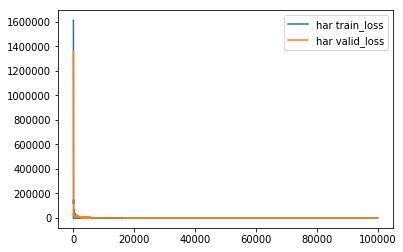

In [19]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss, label='har train_loss')
mplot.plot(valid_loss, label='har valid_loss')
mplot.legend()
mplot.show()

In [21]:
# initilize the saver which has already been initialized.
test_loss = []

with tf.Session() as sess:
    # Restore the validated model
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    ################## Test
    loss_batch = []    
    # Loop over batches
    for X_test_norm_batch, _ in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        # No learning/training is needed at this step
        feed = {Xin: X_test_norm_batch, keep_prob_ : 1.0}

        # Loss
        # Only the computation of the cost is needed
        loss = sess.run(fetches=[cost], feed_dict = feed)
        loss_batch.append(loss)

    # Store
    test_loss.append(np.mean(loss_batch))

    # Print info for every iter/epoch
    print("Test loss: {:6f}".format(np.mean(test_loss)))

INFO:tensorflow:Restoring parameters from checkpoints/cnn-har-TEST.ckpt
Test loss: 0.605664
